Name: Irmak Ercevik

ID: 123456789

Course: BIL570 /BIL470

In [673]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from dt import DecisionTreeClassifier
import importlib
import sklearn.metrics as metrics
from sklearn.preprocessing import label_binarize
%matplotlib inline

# Exploratory Data Analysis (EDA)

In [674]:
df = pd.read_csv('Iris.csv',index_col='Id')
df['Species']=df.Species.map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
df['Species'] = pd.to_numeric(df['Species'])
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [675]:
print('Shape of DF:',df.shape)
print(df.dtypes,'\n')
df.info()

Shape of DF: (150, 5)
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 7.0 KB


In [676]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [677]:
df[df.duplicated()] # but maybe two iris has same values 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
35,4.9,3.1,1.5,0.1,0
38,4.9,3.1,1.5,0.1,0
143,5.8,2.7,5.1,1.9,2


In [678]:
df.isna().sum()/df.shape[0] #percentage of null values

SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

In [679]:
df['Species'].value_counts() #Balanced dataset

0    50
1    50
2    50
Name: Species, dtype: int64

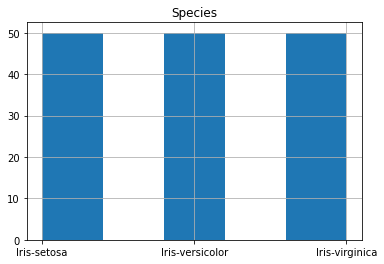

In [680]:
labels=['Iris-setosa','Iris-versicolor','Iris-virginica']
hist = df.hist('Species',bins=5)
plt.xticks((0,1,2),labels)
plt.show()

In [681]:
df.corr()['Species'] # petal width and petal length has a high correlation with spicies

SepalLengthCm    0.782561
SepalWidthCm    -0.419446
PetalLengthCm    0.949043
PetalWidthCm     0.956464
Species          1.000000
Name: Species, dtype: float64

*   setosa petal width and length is smaller but sepal width and length is bigger than others<br>
*   versicolor generally groups in the middle<br>
*   virginica has large petal width and length, and has large sepal length but smaller sepal width<br>
vvvvvvvvvvvvvvvvvvvv <font color='red'>description of below</font> vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv

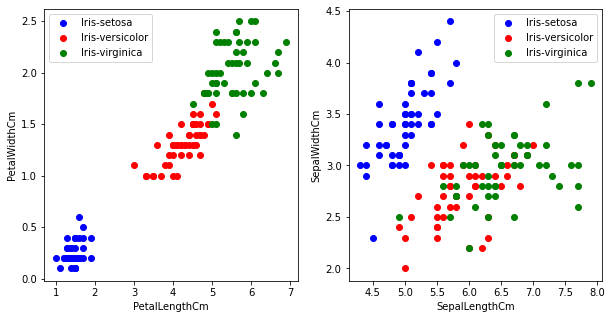

In [682]:
c_dic={0:'b', 1:'r',2:'g'}
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
ax1.set_xlabel('PetalLengthCm')
ax1.set_ylabel('PetalWidthCm')
ax2.set_xlabel('SepalLengthCm')
ax2.set_ylabel('SepalWidthCm')

for i in range(0,3):
    X=df[df['Species']==i]['PetalLengthCm']
    Y=df[df['Species']==i]['PetalWidthCm']
    ax1.scatter(x=X,y=Y,c=c_dic[i],label=labels[i])
for i in range(0,3):
    X=df[df['Species']==i]['SepalLengthCm']
    Y=df[df['Species']==i]['SepalWidthCm']
    ax2.scatter(x=X,y=Y,c=c_dic[i],label=labels[i])

ax1.legend()
ax2.legend()


*   high correlation between petal length and petal width<br>
*   sepal length and sepal width has weak correlation<br>
vvvvvvvvvvvvvvvvvvvv <font color='red'>description of below</font> vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv

[]

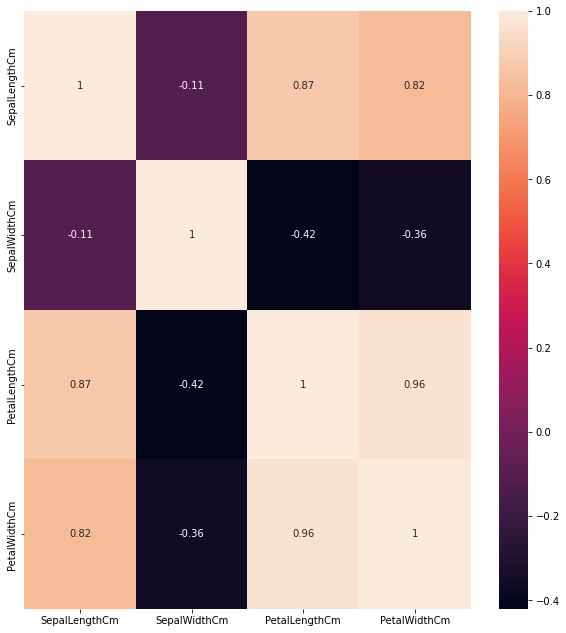

In [683]:
plt.figure(figsize=(10,11))
sns.heatmap(df.drop('Species',axis=1).corr(),annot=True)
plt.plot()

In [684]:
df.groupby('Species').agg(['mean', 'median']).rename(index={0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'})

SepalLengthCm        SepalWidthCm        PetalLengthCm         \
                         mean median         mean median          mean median   
Species                                                                         
Iris-setosa             5.006    5.0        3.418    3.4         1.464   1.50   
Iris-versicolor         5.936    5.9        2.770    2.8         4.260   4.35   
Iris-virginica          6.588    6.5        2.974    3.0         5.552   5.55   

                PetalWidthCm         
                        mean median  
Species                              
Iris-setosa            0.244    0.2  
Iris-versicolor        1.326    1.3  
Iris-virginica         2.026    2.0

*   Iris-Setosa is not disturbed widely <br>
*   Iris-Versicolor is disturbed widely<br>
*   Iris-Virginica is highly disturbed <br>
vvvvvvvvvvvvvvvvvvvv <font color='red'>description of below</font> vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv

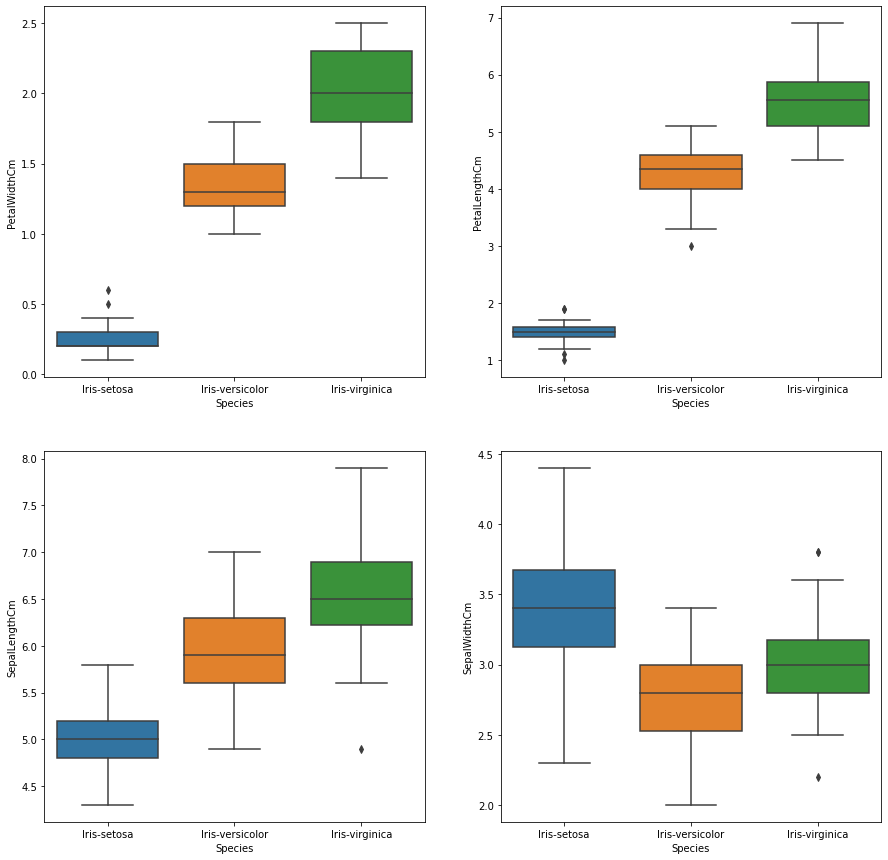

In [685]:
f, axes = plt.subplots(2, 2,figsize=(15,15))
sns.boxplot( y="PetalWidthCm", x= "Species", data=df, orient="v" , ax=axes[0, 0]).set_xticklabels(labels)
sns.boxplot( y="PetalLengthCm", x= "Species", data=df, orient="v" , ax=axes[0, 1]).set_xticklabels(labels)
sns.boxplot( y="SepalLengthCm", x= "Species", data=df, orient="v" , ax=axes[1, 0]).set_xticklabels(labels)
sns.boxplot( y="SepalWidthCm", x= "Species", data=df, orient="v" , ax=axes[1, 1]).set_xticklabels(labels)
plt.show()

ax1.legend()
ax2.legend()



*   Iris-Setosa is not disturbed widely in case of petal width and length <br>
*   Iris-Setosa is good disturbed in case of sepal width <br>
*   Iris-Versicolor is disturbed widely on every manner<br>
*   Iris-Virginica is highly disturbed <br>
vvvvvvvvvvvvvvvvvvvv <font color='red'>description of below</font> vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv

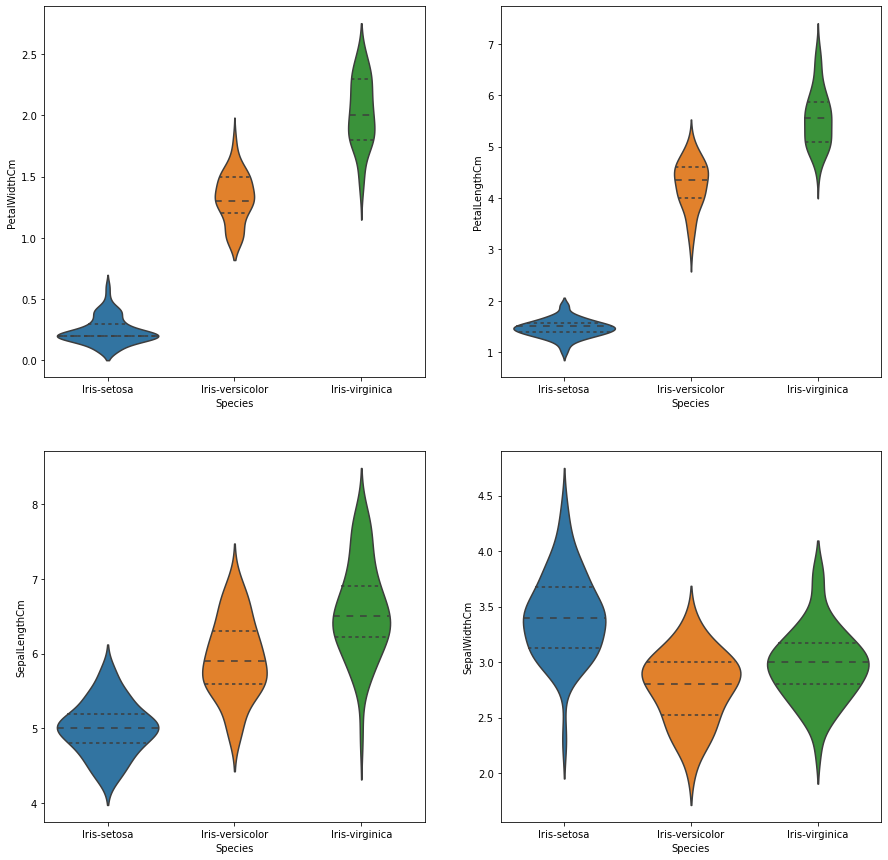

In [686]:
fig, axes = plt.subplots(2, 2, figsize=(15,15))
sns.violinplot( y="PetalWidthCm", x= "Species", data=df, orient="v" , ax=axes[0, 0],inner="quartile").set_xticklabels(labels)
sns.violinplot( y="PetalLengthCm", x= "Species", data=df, orient="v" , ax=axes[0, 1],inner="quartile").set_xticklabels(labels)
sns.violinplot( y="SepalLengthCm", x= "Species", data=df, orient="v" , ax=axes[1, 0],inner="quartile").set_xticklabels(labels)
sns.violinplot( y="SepalWidthCm", x= "Species", data=df, orient="v" , ax=axes[1, 1],inner="quartile").set_xticklabels(labels)
plt.show()

Same Things with others

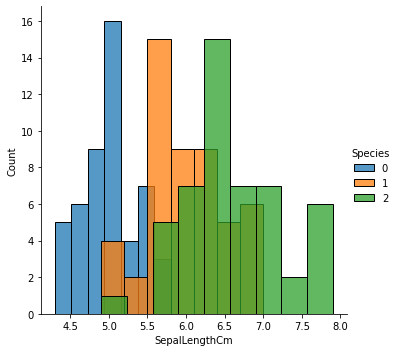

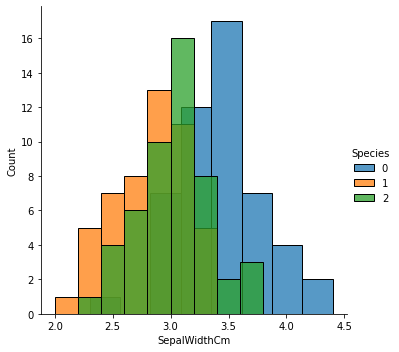

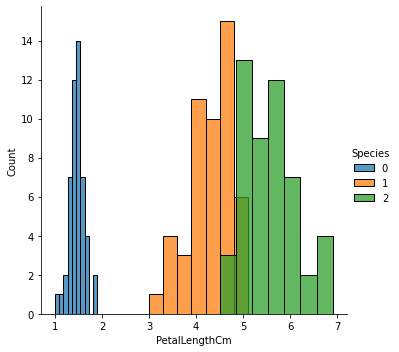

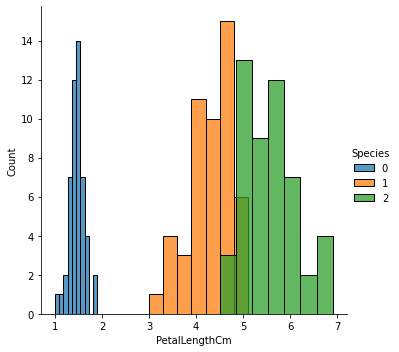

In [687]:
sns.FacetGrid(df, hue="Species", height=5) \
.map(sns.histplot, "SepalLengthCm") \
.add_legend()

sns.FacetGrid(df, hue="Species", height=5) \
.map(sns.histplot, "SepalWidthCm") \
.add_legend()

sns.FacetGrid(df, hue="Species", height=5) \
.map(sns.histplot, "PetalLengthCm") \
.add_legend()

sns.FacetGrid(df, hue="Species", height=5) \
.map(sns.histplot, "PetalLengthCm") \
.add_legend()
plt.show()

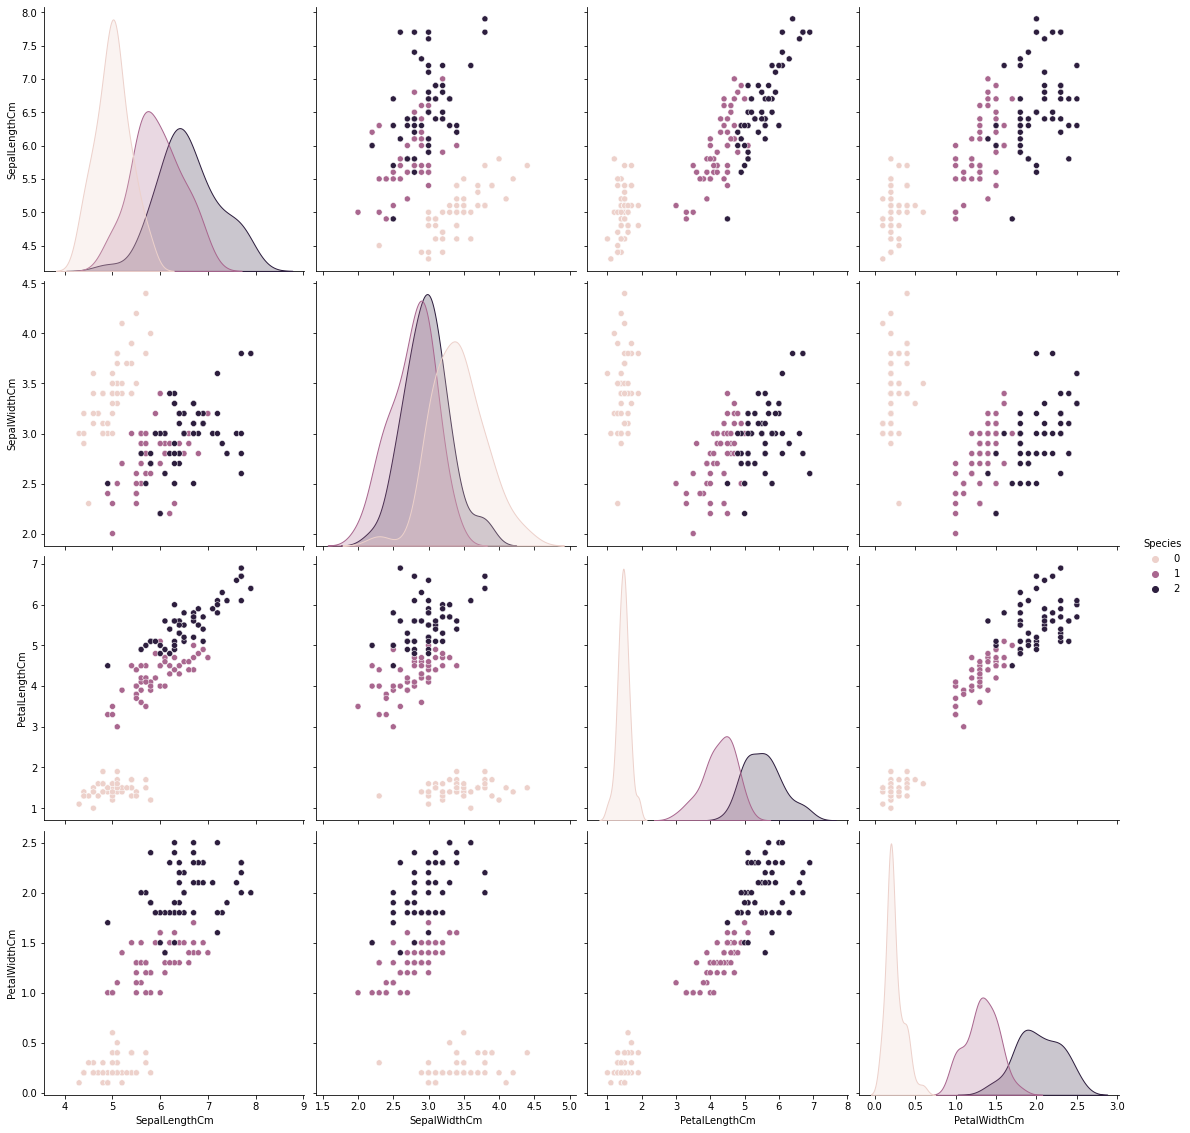

In [688]:
sns.pairplot(df,hue="Species",height=4)

# Train the classifier

Split dataset to train and test

In [689]:
clf = DecisionTreeClassifier(max_depth=5)
X=df.values.tolist();
y=[];
for row in X:
    y.append(int(row[4]));
    del row[4];
X=pd.Series(X);
y=pd.Series(y);
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True);

X_train_list=X_train.values.tolist();
y_train_list=y_train.values.tolist();
X_test_list=X_test.values.tolist();
y_test_list=y_test.values.tolist();
clf.fit(X_train_list,y_train_list);


### Train The Classifier

In [690]:
clf.printTree()

Column: PetalLengthCm threshold <= 1.9 impurity: 0.3334027777777778
.Decided Class: 0
.Column: PetalLengthCm threshold <= 4.9 impurity: 0.364898059396606
..Column: PetalWidthCm threshold <= 1.6 impurity: 0.1667568054804399
...Decided Class: 1
...Column: SepalWidthCm threshold <= 3.0 impurity: 0.2777777777777777
....Decided Class: 2
....Decided Class: 1
..Column: PetalLengthCm threshold <= 5.0 impurity: 0.012052593133674155
...Column: SepalLengthCm threshold <= 6.3 impurity: 0.375
....Decided Class: 2
....Decided Class: 1
...Decided Class: 2


In [691]:
yhat = clf.predict(X_test_list)
print("Test Features Expected Classification")
print(y_test_list)
print("Prediction")
print(yhat);
xhat = clf.predict(X_train_list)
print("Train Features Expected Classification")
print(y_train_list)
print("Prediction")
print(xhat);

Test Features Expected Classification
[0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 2, 0, 2, 1, 1, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2]
Prediction
[0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 0, 1, 0, 2, 0, 2, 1, 1, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2]
Train Features Expected Classification
[2, 1, 1, 0, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 2, 1, 0, 2, 2, 0, 1, 2, 2, 0, 0, 1, 1, 1, 1, 2, 1, 0, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 1, 1, 2, 1, 1, 2, 0, 2, 2, 0, 0, 2, 1, 2, 1]
Prediction
[2, 1, 1, 0, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 2, 1, 0, 2, 2, 0, 1, 2, 2, 0, 0, 1, 1, 1, 1, 2, 1, 0, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 1, 1, 2, 1, 1, 2, 0, 2, 2, 0, 0, 2, 1, 2, 

### Predict Class of Test values

# Results

### Confusion Matrix of Test

<AxesSubplot:>

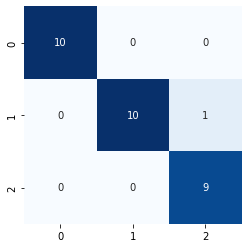

In [692]:
conf_mat = metrics.confusion_matrix(y_test_list, yhat)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

### Confusion Matrix of Train

<AxesSubplot:>

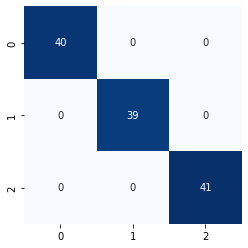

In [693]:
conf_mat = metrics.confusion_matrix(y_train_list, xhat)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

NEEDED FUNCTIONS FOR SCORES

In [694]:
def perf_measure(yactual, yhat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(yhat)): 
        if yactual[i]==yhat[i]==2:
           TN += 1
        if yhat[i]==2 and yactual[i]!=yhat[i]:
           FN += 1
        if yactual[i]==yhat[i]==1:
           TP += 1
        if yhat[i]==1 and yactual[i]!=yhat[i]:
           FP += 1
        if yactual[i]==yhat[i]==0:
           TN += 1
        if yhat[i]==0 and yactual[i]!=yhat[i]:
           FN += 1
       
        

    return(TP, FP, TN, FN)
TP,FP,TN,FN = perf_measure(y_test_list, yhat)

### F1-Score

In [695]:
precision = TP/(FP+TP)
recall = TP/(FN+TP)
Accuracy = (TP + TN)/ (TP + FN + TN + FP)
F1 = 2 * (precision * recall ) / (precision+recall)
F1

0.9523809523809523

### Accuracy

In [696]:
Accuracy

0.9666666666666667

### Precision

In [697]:
precision

1.0

### Recal

In [698]:
recall

0.9090909090909091

### Plot of ROC Curve (Test/Train) and Value of AUC (Test/Train)

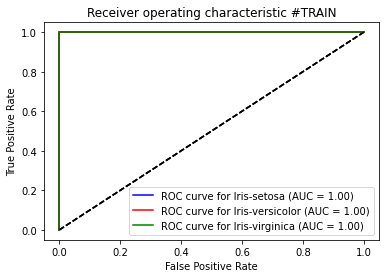

In [699]:
#train
y_train_list = np.array(y_train_list)
y_train_list = label_binarize(y_train_list, classes=[0, 1, 2])
n_classes = y_train_list.shape[1]

xhat= np.array(xhat)
xhat = label_binarize(xhat, classes=[0, 1, 2])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i],_ = metrics.roc_curve(y_train_list[:, i], xhat[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
plt.figure()
for i in range(n_classes):
    color = "blue" if i==0 else "red" if i ==1 else "green"
    specie = "Iris-setosa" if i==0 else "Iris-versicolor" if i ==1 else "Iris-virginica"
    plt.plot(fpr[i], tpr[i], label='ROC curve for %s (AUC = %0.2f)' % (specie,roc_auc[i]),color=color)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic #TRAIN')
plt.legend(loc="lower right")
plt.show()

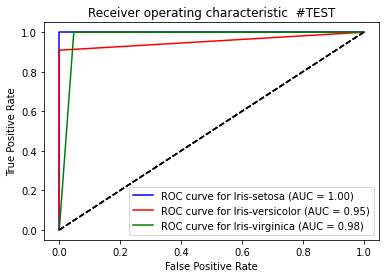

In [700]:
#test
y_test_list = np.array(y_test_list)
y_test_list = label_binarize(y_test_list, classes=[0, 1, 2])
n_classes = y_test_list.shape[1]

yhat= np.array(yhat)
yhat = label_binarize(yhat, classes=[0, 1, 2])
fpr = dict()
tpr = dict()
roc_auc = dict()
thresholds=np.linspace(0,1,100)
for i in range(n_classes):
    fpr[i], tpr[i],_ = metrics.roc_curve(y_test_list[:, i], yhat[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
plt.figure()
for i in range(n_classes):
    color = "blue" if i==0 else "red" if i ==1 else "green"
    specie = "Iris-setosa" if i==0 else "Iris-versicolor" if i ==1 else "Iris-virginica"
    plt.plot(fpr[i], tpr[i], label='ROC curve for %s (AUC = %0.2f)' % (specie,roc_auc[i]),color=color)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic  #TEST')
plt.legend(loc="lower right")
plt.show()